In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm
import random
from scipy.stats import multivariate_normal


In [2]:
def read_data():
    df = pd.read_excel('data.xlsx')

    c1 = {'Largo': [], 'Ancho': []}
    c2 = {'Largo': [], 'Ancho': []}

    for i in range(len(df)):
        if df['Clase'][i] == 1:
            c1['Largo'].append(df['Largo'][i]) 
            c1['Ancho'].append(df['Ancho'][i])
        else:
            c2['Largo'].append(df['Largo'][i]) 
            c2['Ancho'].append(df['Ancho'][i])
    return c1, c2

In [3]:
def calculate_varianze (c_1, c_2,):
    centroide1 = np.mean(c_1, axis = 0)
    centroide2 = np.mean(c_2, axis = 0)
    
    var1 = np.sum((c_1 - centroide1)**2) * (1/len(c_1))
    var2 = np.sum((c_2 - centroide2)**2) * (1/len(c_2))
    return var1 + var2

def update_clases(largos, anchos, centroides):
    c1 = []
    c2 = []
    for i in range(len(largos)):
        dist1 = np.linalg.norm([largos[i] - centroides[0][0], anchos[i] - centroides[0][1]])
        dist2 = np.linalg.norm([largos[i] - centroides[1][0], anchos[i] - centroides[1][1]])
        if dist1 < dist2:
            c1.append((largos[i], anchos[i]))
        else:
            c2.append((largos[i], anchos[i]))
    return c1, c2

def K_means(largos, anchos, max_iters=8):
    centroides = [(20, 20), (21, 21)]
    varianzas = []

    fig = plt.figure(figsize=(12, 8))
    
    for iteracion in tqdm(range(max_iters)):
        c1, c2 = update_clases(largos, anchos, centroides)
        ax = fig.add_subplot(3, 3, iteracion + 1)
        ax.set_title(f"Iteración {iteracion}")
        c1 = np.array(c1)
        c2 = np.array(c2)
        varianzas.append(calculate_varianze(c1, c2))
        ax.scatter(c1[:, 0], c1[:, 1], color='r', alpha=0.5)
        ax.scatter(c2[:, 0], c2[:, 1], color='b', alpha=0.5)
        ax.grid(True)
        ax.scatter(centroides[0][0], centroides[0][1], color='black', marker='x')
        ax.scatter(centroides[1][0], centroides[1][1], color='black', marker='x')
        centroide_nuevo_1 = (np.mean(c1[:, 0]), np.mean(c1[:, 1]))
        centroide_nuevo_2 = (np.mean(c2[:, 0]), np.mean(c2[:, 1]))
        centroides = [centroide_nuevo_1, centroide_nuevo_2]

    ax = fig.add_subplot(3, 3, 9)
    ax.set_title("Varianza")
    ax.plot(varianzas)
    ax.grid(True)

    plt.tight_layout()
    plt.show()

100%|██████████| 8/8 [00:00<00:00, 15.78it/s]


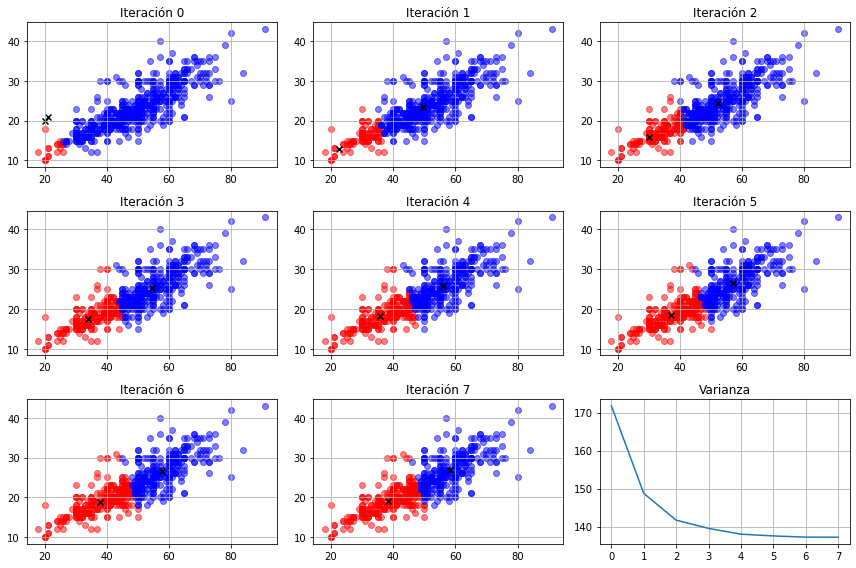

In [4]:
c1, c2 = read_data()
largos = c1['Largo'] + c2['Largo']
anchos = c1['Ancho'] +  c2['Ancho']
K_means(largos, anchos)